In [4]:
from sklearn import datasets
import numpy as np

In [5]:
iris = datasets.load_iris()
dataset = iris.data
print('dataset shape:',dataset.shape)
labels = iris.target
print('labels shape:',labels.shape)

dataset shape: (150, 4)
labels shape: (150,)


In [8]:
class LDA():
    def __init__(self,k,m):
        if m > k-1:
            print('Error! m must smaller than k! ')
        
        self.n_class = k;
        self.m = m
        
        
    def VarianceInClass(self,dataset,labels):
        [length,width] = dataset.shape
        self.length = length
        self.width = width
        self.varianceIn = np.zeros((self.width,self.width))
        
        for i in range(self.n_class):
            data = dataset[labels==i]
            average = np.mean(data,axis=0)
            self.varianceIn +=  (data - average).T @ (data - average)
        
    
    def VarianceEnterClass(self,dataset,labels):
        self.varianceEnter = np.zeros((self.width,self.width))
        TotalAverage = np.mean(dataset,axis=0)
        
        for i in range(self.n_class):
            data = dataset[labels==i]
            [length,width] = data.shape
            average = np.mean(data,axis=0)
            self.varianceEnter[i] = length*(average - TotalAverage).T @ (average - TotalAverage)
        
        
    def Transform(self,dataset,labels):
        self.VarianceInClass(dataset,labels)
        self.VarianceEnterClass(dataset,labels)
        self.Matrix = np.linalg.inv(self.varianceIn) @ self.varianceEnter
        [eigvals,eigvecs] = np.linalg.eig(self.Matrix)
        
        for i in range(eigvals.size):
            indice = i
            for j in range(eigvals.size):
                if j > i:
                    if eigvals[j] > eigvals[indice]:
                        indice = j
                        
            eigvals[i],eigvals[indice] = eigvals[indice],eigvals[i]
            eigvecs[:,i],eigvecs[:,indice] = eigvecs[:,indice],eigvecs[:,i]
        
        self.eigvals = eigvals
        self.eigvecs = eigvecs
        
        NewFeature = dataset @ self.eigvecs[:,0:self.m]
        
        return NewFeature

In [10]:
lda = LDA(3,2)
new_features = lda.Transform(dataset,labels)

<function matplotlib.pyplot.show(*args, **kw)>

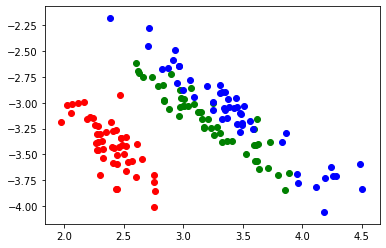

In [12]:
import matplotlib.pyplot as plt

plt.scatter(new_features[:50,0],new_features[:50,1],c='r')
plt.scatter(new_features[50:100,0],new_features[50:100,1],c='g')
plt.scatter(new_features[100:150,0],new_features[100:150,1],c='b')
plt.show